In [1]:
#Importing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#Reading CSV and imputing by mean
df = pd.read_csv('data/encoded_df.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [3]:
#taking a copy of loan_ID and deleting
loan_id_df = df['Loan_ID']
del df['Loan_ID']
#Imputing by mean
print ("Imputing missing data using mean")
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values=np.nan, strategy='mean', axis=0)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
df = pd.DataFrame(imputed_data, columns=list(df))
print (type(loan_id_df))
#df.head()

Imputing missing data using mean
<class 'pandas.core.series.Series'>


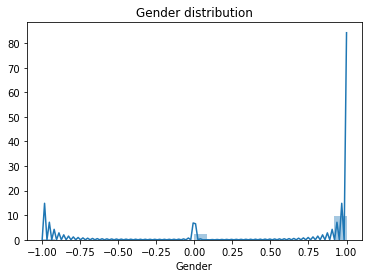

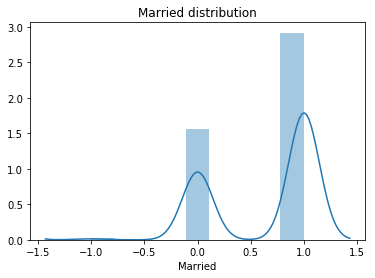

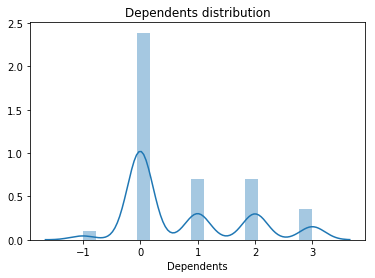

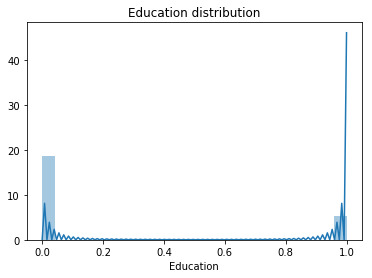

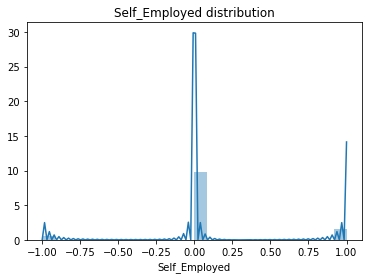

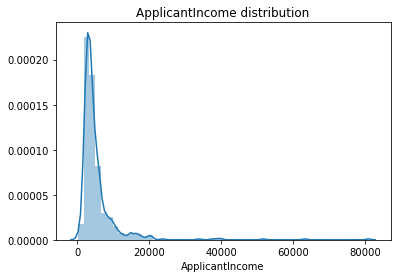

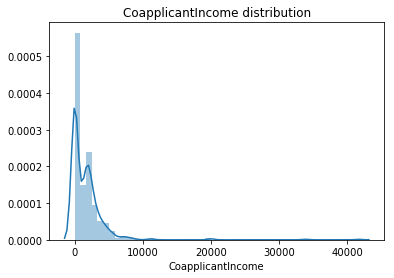

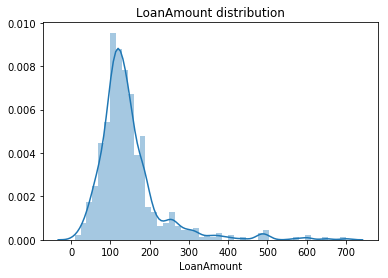

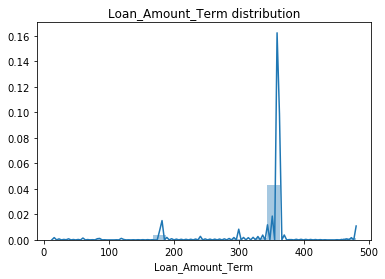

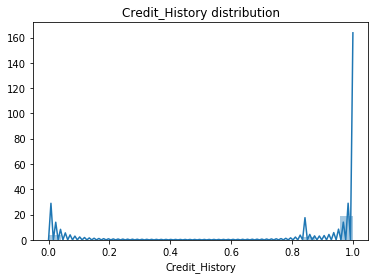

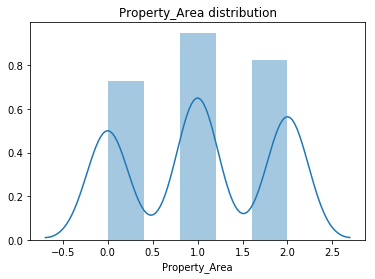

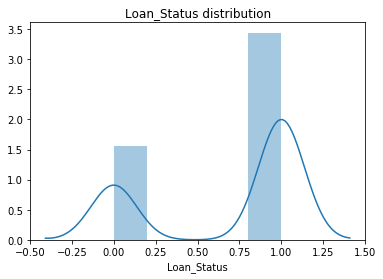

In [4]:
#Distribution plots for all columns

col_names = list(df)

for col in col_names:
    inc_plot = sns.distplot(df[col], axlabel=col).set_title(col+" distribution")
    plt.show()

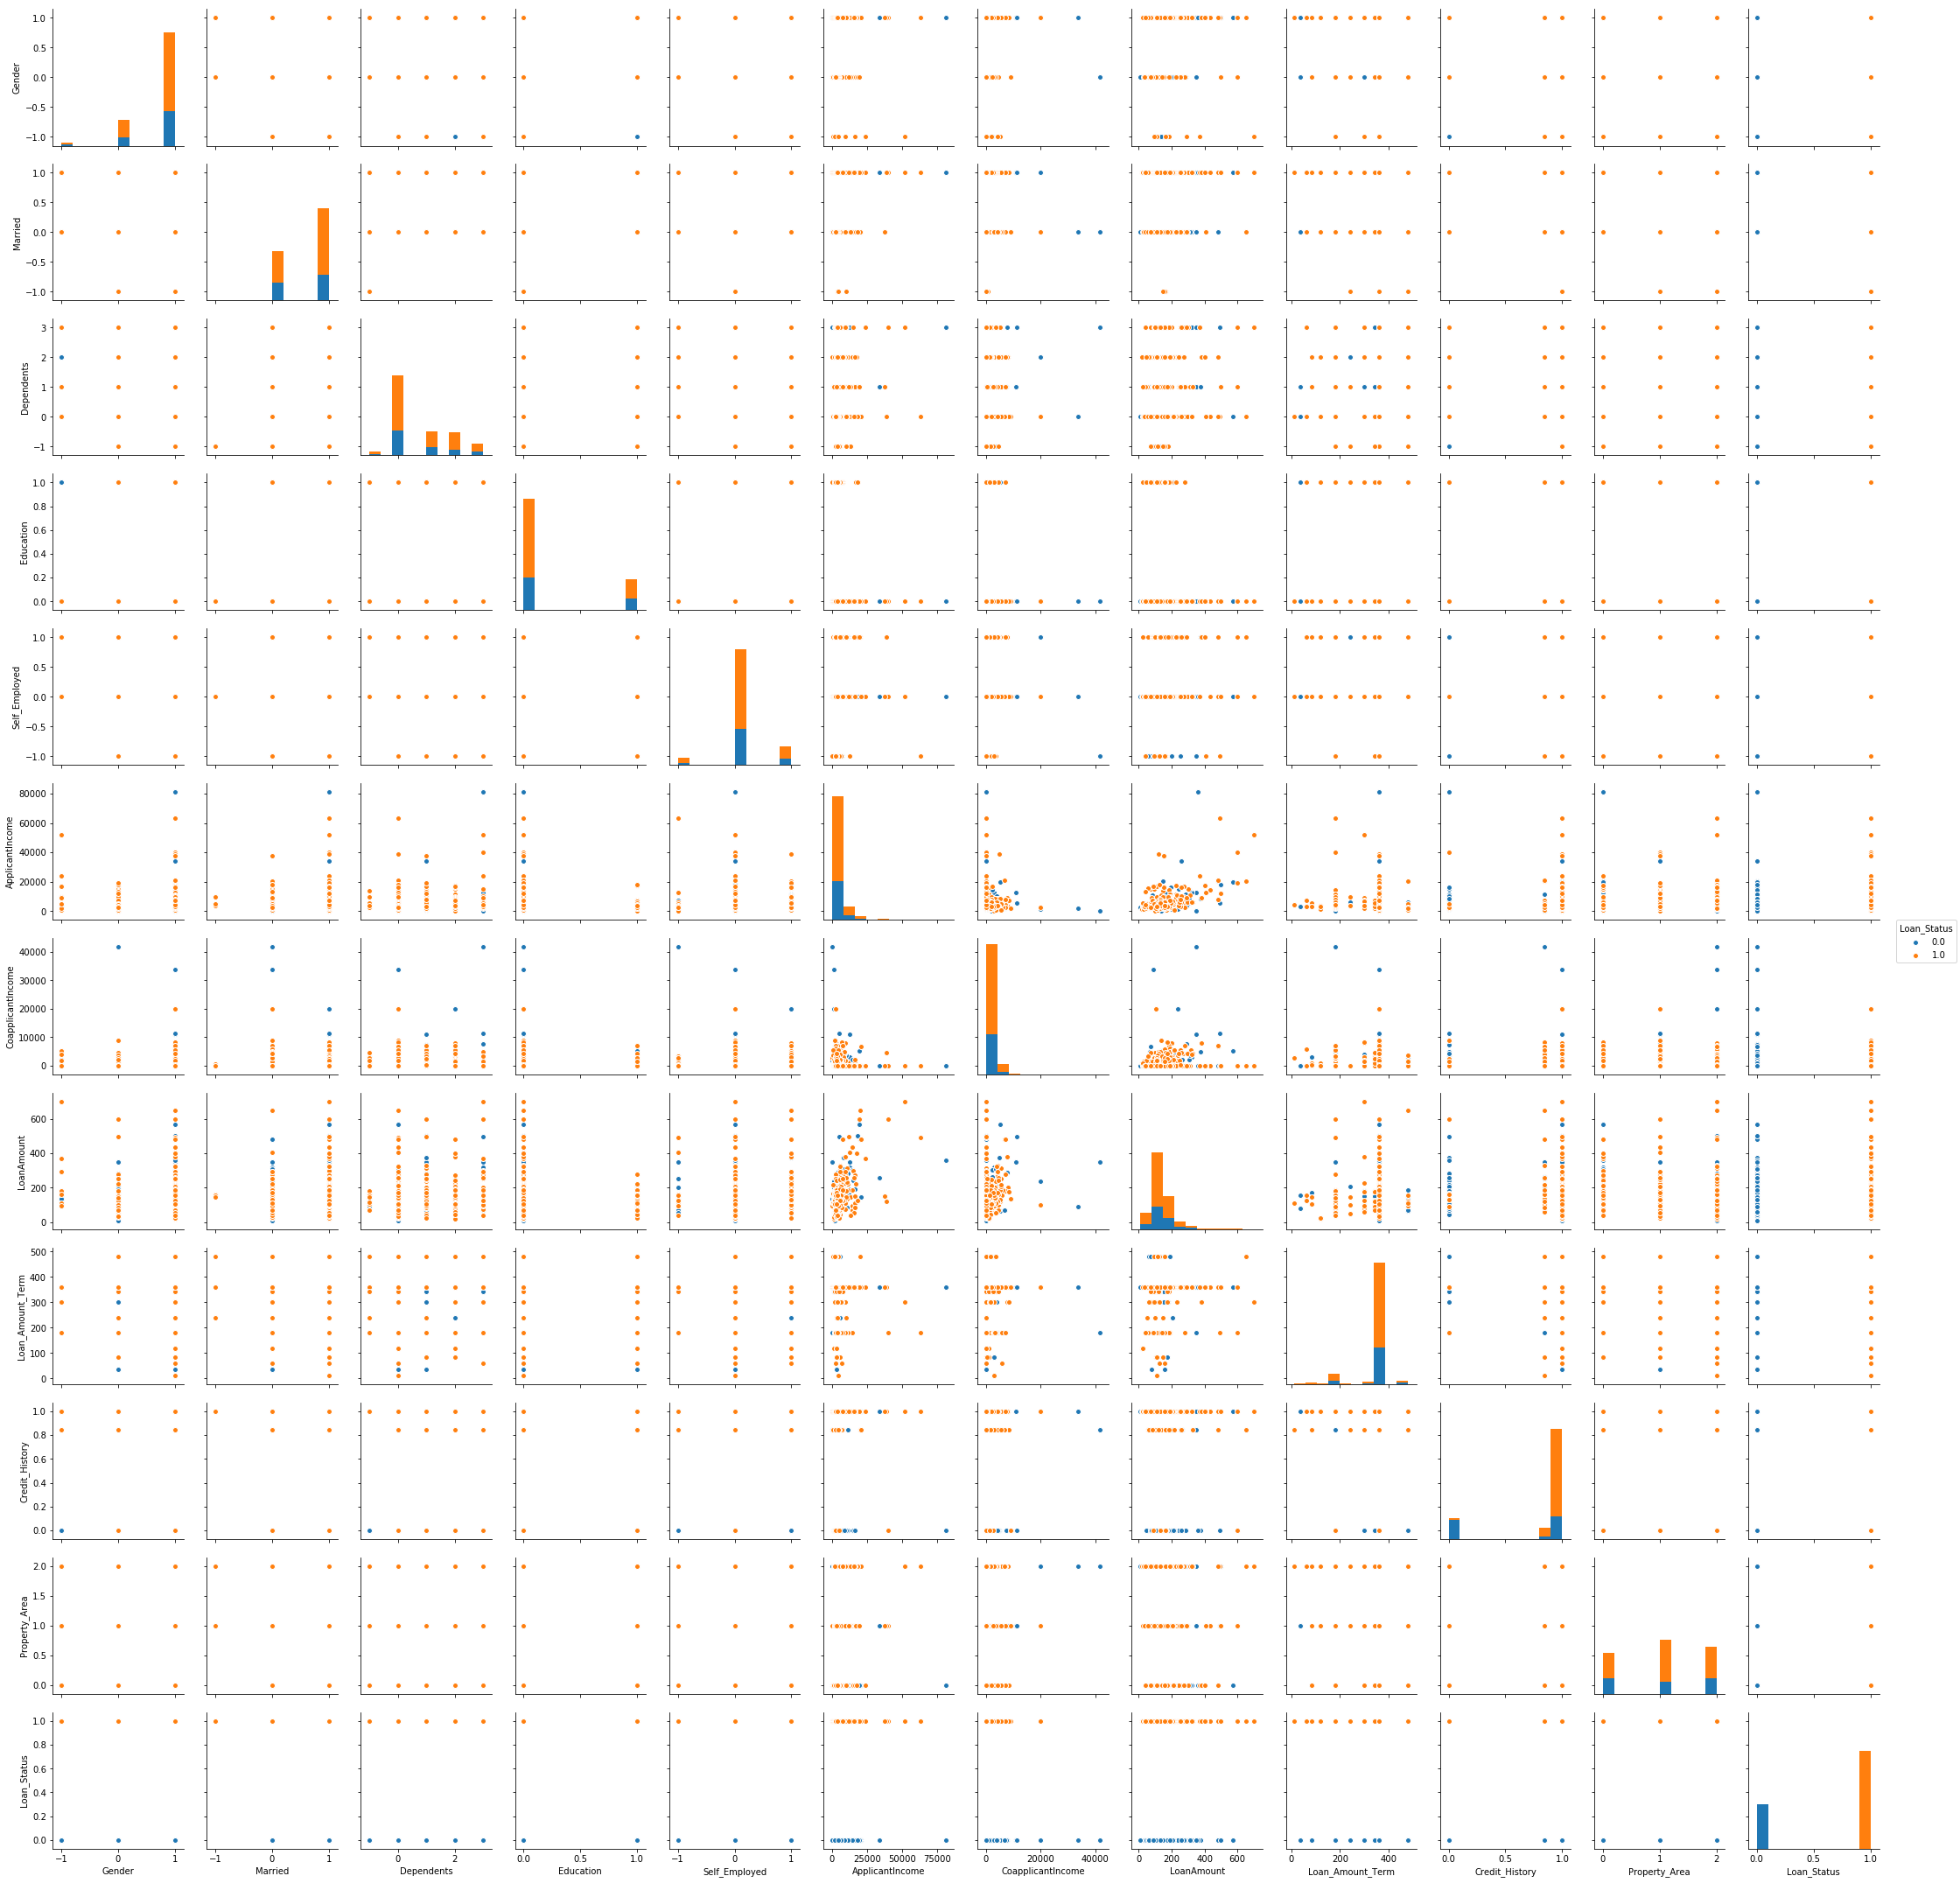

In [5]:
pair_plot = sns.pairplot(df.dropna(), hue = 'Loan_Status')
plt.show()

In [6]:
#df['Loan_ID'] = loan_id_df
#df.head()
df.insert(0, 'Loan_ID', loan_id_df)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,LP001003,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,LP001005,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.000000,360.0,1.0,2.0,1.0
3,LP001006,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,2.0,1.0
4,LP001008,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0


In [7]:
#Save df to csv
df.to_csv('data/data_imputed_mean.csv')